# Missing values --- Feature engineering 
Lifecycle of data science project :
> 1. collection of data --- this maybe from various sources , API's , DB
> 2. Feature Engineering --- Handling missing values

#### <i>Why there are missing values in dataset?</i>
- human error while noting the data
- Information is not available due to certain factors like death
- People hesitate to put down the information
- Mostly men hides salary
- Women hides their age



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'F:\USERS\HP\Downloads\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Types of Missing values

## 1) Missing Completly at Random (MCAR)
- It means all missing datapoints have same probability of being missing 
- There is <b>no relationship</b> between missing data and other data

In [4]:
# Embark means to step-in the boat (to begin)
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


> as <b>embark</b> has 2 missing values and it is <b>not in a relation with</b> any other missing value columns . So this <b>it is MNAR</b>

## 2) Missing Not at Random (MNAR)
- It means missing value columns has realtionship with other values

### Obervations : 
- As <b>Age and Cabin</b> having most of the missing values and age must be <b>in a relationship</b> with cabin such that , the person inside th perticular cabin are died .So , age values are missing . So they are <b>MNAR</b>

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# convertng the cabin values , where if cabin is NaN , replace with 1 else 0

df['Cabin_null'] = np.where(df['Cabin'].isnull() , 1 , 0)

In [7]:
print(df['Cabin_null'].mean())
df.head()

0.7710437710437711


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


##  Missing at random(MAR)
- men -- hides the salary 
- women -- hdes the Age 

### techniques to deal with MAR 
### here we are dealing with integer column values
- 1) Mean , median , mode imputation
- 2) 

### 1) Mean , mode , median imputation

In [8]:
df = pd.read_csv(r"F:\USERS\HP\Downloads\train.csv" , usecols=['Age' , 'Fare' , 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
df['Age'].isnull().mean()

0.19865319865319866

In [10]:
def imput_nan(df,variable,median):
    df[variable + '_median'] = df[variable].fillna(median)

In [11]:
median = df['Age'].median()
median

28.0

In [12]:
imput_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [13]:
df['Age_median'].isnull().sum()

0

In [14]:
df['Age_median'].std()

13.019696550973194

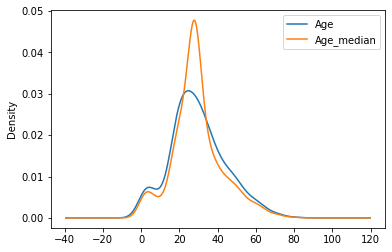

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde',ax = ax)
df['Age_median'].plot(kind = 'kde' , ax = ax)
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines , labels , loc = 'best')

### 2. Random sample imputation
- It is simply taking random values from the existing dataset and replacing the nan values with the sample values which are taken randomly

- we can use this method , only if data is Missing Completely at Random(MCAR)

In [16]:
df = pd.read_csv(r"F:\USERS\HP\Downloads\train.csv" , usecols=['Age' , 'Fare' , 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [17]:
# it gives how many NaN values are present in that column
df.Age.isnull().sum()

177

In [18]:
# As we have to replace  all the NaN values with random samples , so we have to give the entire length of NaN value as input ot sample funciton
df.Age.dropna().sample(df.Age.isnull().sum() , random_state=0)

# df.Age.dropna().sample()   it returns a random value from the Age column

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [19]:
def imput_nan(df,variable,median):
    df[variable + '_median'] = df[variable].fillna(median)
    # here simply we are assigning the one column value(here Age) to another newly created column(here Age_random)
    df[variable + '_random'] = df[variable]
    # it will give all the values by replacing it with random  sampled value
    random_sample = df.Age.dropna().sample(df.Age.isnull().sum() , random_state=0)
    # we have to pick all the indexes of random sampled value rows
    random_sample.index = df[df[variable].isnull()].index
    # just replace all the randomly sampled imputed value in original column NaN values
    df.loc[df[variable].isnull() , variable + '_random' ] = random_sample

In [20]:
median = df.Age.median()
median

28.0

In [21]:
imput_nan(df,'Age',median)

In [22]:
df.head(100,)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
95,0,NaN,8.0500,28.0,40.0
96,0,71.0,34.6542,71.0,71.0
97,1,23.0,63.3583,23.0,23.0
98,1,34.0,23.0000,34.0,34.0


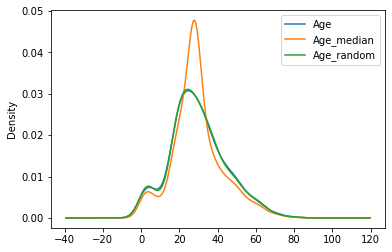

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde',ax = ax)
df.Age_median.plot(kind = 'kde' , ax = ax)
df['Age_random'].plot(kind = 'kde' , ax = ax)
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines , labels , loc = 'best')

###  Advantages : 
- Easy to implement
- there is less distortion in variance

### disadvantages : 
- Every time the randomness wont work

### 3. Capturing NaN values with new features
- It works with data which is Missing not at random(MNAR)

In [24]:
df = pd.read_csv(r"F:\USERS\HP\Downloads\train.csv" , usecols=['Age' , 'Fare' , 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [25]:
# here I am creating a new feature 
df['Age_NaN'] = np.where(df['Age'].isnull() , 1 , 0)
df.head(100)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
95,0,NaN,8.0500,1
96,0,71.0,34.6542,0
97,1,23.0,63.3583,0
98,1,34.0,23.0000,0


###  Advantages : 
- Easy to implement
- Captures the importance of missing value

### Disadvantages : 

- Creating new additional features which leads to curse of dimensionality


### 4. End of distribution Imputation


In [26]:
df = pd.read_csv(r"F:\USERS\HP\Downloads\train.csv" , usecols=['Age' , 'Fare' , 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

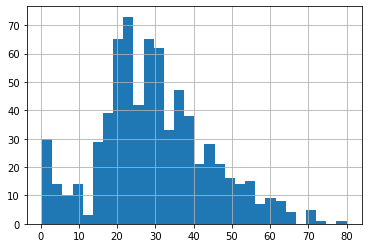

In [27]:
df.Age.hist(bins= 30)

#### from the above distribution , I will take end of the distribution values and simply I will replace it with NaN values
#### Here I am just replacing the NaN values with the values after 3rd std deviation values

In [28]:
# it is the value after 3rd std deviation 
extreme = df.Age.mean()+3*df.Age.std()

<AxesSubplot:xlabel='Age'>

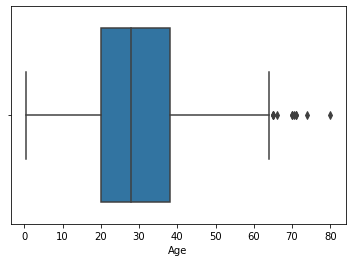

In [29]:
sns.boxplot(x = df.Age,data = df)

In [30]:
def imput_nan(df,variable,median,extreme):
    df[variable + '_end_distribution'] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace = True)
    

In [31]:
imput_nan(df,'Age',df.Age.median(),extreme)

In [32]:
df.head(50)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


In [33]:
df.columns

Index(['Survived', 'Age', 'Fare', 'Age_end_distribution'], dtype='object')

<AxesSubplot:>

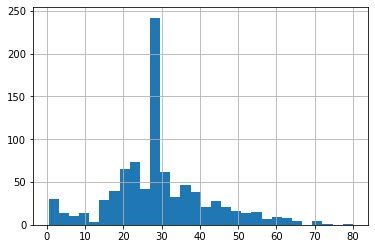

In [34]:
df.Age.hist(bins = 30)

<AxesSubplot:>

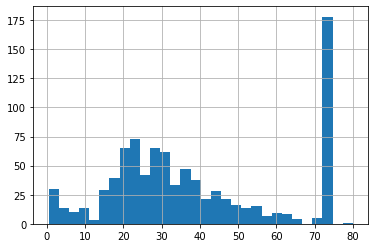

In [35]:
df.Age_end_distribution.hist(bins = 30)

<AxesSubplot:xlabel='Age_end_distribution'>

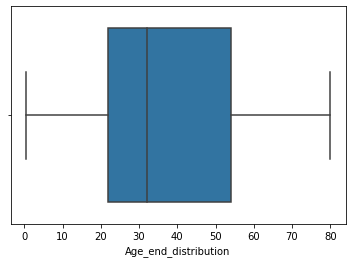

In [36]:
sns.boxplot(x = 'Age_end_distribution' , data = df)

<AxesSubplot:xlabel='Age'>

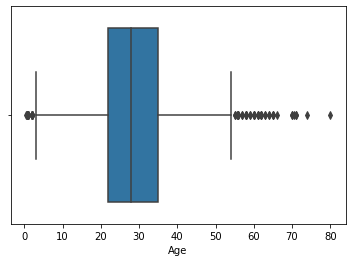

In [37]:
sns.boxplot(x = 'Age' , data = df)

### 5. Arbitrary Value imputation
- This technique is not much important , so it is not used frequently in business problems
- It is replacing all NaN values with arbitrary value 

In [38]:
df = pd.read_csv(r"F:\USERS\HP\Downloads\train.csv" , usecols=['Age' , 'Fare' , 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


- Here in this kind of techniques we are simply replacing NaN values with any random / arbitrary value which is not more frequently occurred

In [39]:
# here I am replacing the NaN values with any random value like 100
def impute_nan(df, variable):
    df[variable + "_arbitrary-value"] = df[variable].fillna(100)

In [40]:
impute_nan(df , 'Age')

In [43]:
df.head(50)

,Survived,Age,Fare,Age_arbitrary-value
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,100.0
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0
8,1,27.0,11.1333,27.0
9,1,14.0,30.0708,14.0


<AxesSubplot:>

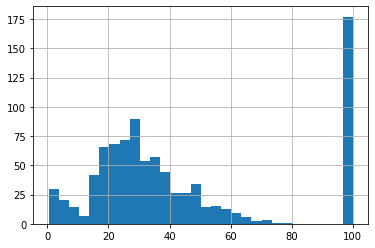

In [44]:
df['Age_arbitrary-value'].histt(bins = 30)

# Handle Categorical missing values 

## Frequent category imputation
- Here we are simply replacing all the NaN values categories which are frequently occured in that column

In [54]:
df = pd.read_csv(r"house_price_train_data.csv" , usecols=['BsmtQual' , 'FireplaceQu' , 'GarageType',  'SalePrice'])

In [55]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [56]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BsmtQual     1423 non-null   object
 1   FireplaceQu  770 non-null    object
 2   GarageType   1379 non-null   object
 3   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 45.8+ KB


In [60]:
# it gives how many NaN values are there in the column
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [63]:
# it shows how many percentage of missing values are there out of all rows
(df.isnull().mean().sort_values(ascending = True))*100

SalePrice       0.000000
BsmtQual        2.534247
GarageType      5.547945
FireplaceQu    47.260274
dtype: float64

- #### As by above observations , we can see that there are very less numebr of missing values in BsmtQual and GarageType features . SO we are simply replacing all the NaN values with most frequently occuring categories in their respective column

## Compute the frequency of every feature in BsmtQual 

In [74]:
# it gives the number of rows per feature
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:>

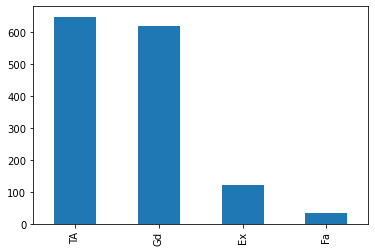

In [75]:
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:xlabel='BsmtQual'>

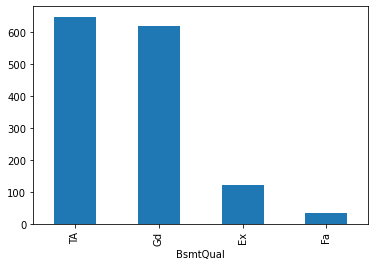

In [76]:
# the below code line works same as above , just it is written in different way
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending = False).plot.bar()

<AxesSubplot:>

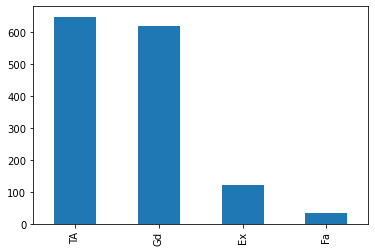

<AxesSubplot:>

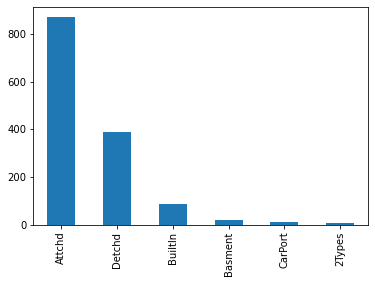

In [78]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

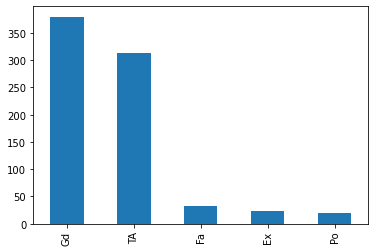

In [79]:
df['FireplaceQu'].value_counts().plot.bar()

### now pick the most frequntly occured category in each column

In [83]:
df['BsmtQual'].value_counts().index[0]

'TA'

In [84]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [85]:
df['FireplaceQu'].value_counts().index[0]

'Gd'

#### observations : 
- So here we have picked the most frequntly occured category from each of the column

In [87]:
def impute_nan(df , variable):
    most_frequent_Category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_Category , inplace = True)

In [88]:
for feature in ['GarageType' , 'FireplaceQu' , 'BsmtQual']:
    impute_nan(df , feature)

In [89]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

### observatoin : 
- Here we have replaced all the NaN values with most frequently occured category

### Advantages : 
1. Easy to implement
2. fastet way to implement

### Disadvantages: 
1. it will distort the relationship vetween most frequently occures categories with saleprice
2. as we are replacing NaN with MFC , then it will over represented 

## imputing NaN values with new_feature
### type 1)  make a new featuer  replace with 0 & 1 

In [90]:
df = pd.read_csv(r"house_price_train_data.csv" , usecols=['BsmtQual' , 'FireplaceQu' , 'GarageType',  'SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [92]:
# first we are preserving the importance of most occuring feature  and replace it with new  feature
df['BsmtQual_var'] = np.where(df['BsmtQual'].isnull() , 1 , 0)
df.head(50)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [97]:
# now we are replacing the NaN values in BsmtQual column with most frequnt categories
frequent = df['BsmtQual'].mode()[0]
frequent

'TA'

In [100]:
df['BsmtQual'].fillna(frequent , inplace = True)
df.head(50)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


#### by this we are capturing the importance of NaN values by making new feature and also by replacing the NaN values with the most frequent categories

In [103]:
df['FireplaceQu_var'] = np.where(df['FireplaceQu'].isnull() , 1, 0 )
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent , inplace = True)
df.head(50)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0
5,Gd,Gd,Attchd,143000,0,1
6,Ex,Gd,Attchd,307000,0,0
7,Gd,TA,Attchd,200000,0,0
8,TA,TA,Detchd,129900,0,0
9,TA,TA,Attchd,118000,0,0


### Type 2) In below we are simply  replcaing the NaN values with new category 
### This is most widely used technique 

In [116]:
df = pd.read_csv(r"house_price_train_data.csv" , usecols=['BsmtQual' , 'FireplaceQu' , 'GarageType',  'SalePrice'])

In [117]:

def impute_nan(df , variable):
    df[variable+'_newvar'] = np.where(df[variable].isnull() , 'missing' , df[variable])

In [118]:
for feature in ['BsmtQual' , 'FireplaceQu' , 'GarageType']:
    impute_nan(df, feature)

In [119]:
df.head(3)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd


In [120]:
df.drop(['BsmtQual' , 'FireplaceQu' , 'GarageType'] , axis = 1 , inplace = True )
df.head()

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
